In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, make_scorer
from joblib import dump, load
from sklearn.linear_model import LogisticRegression, LinearRegression
import math
import requests
import unidecode
from bs4 import BeautifulSoup
from googlesearch import search
import warnings
warnings.filterwarnings("ignore")

# Подготовка данных

In [7]:
recipes = pd.read_csv('epi_r.csv')
recipes

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
recipes.shape

(20052, 680)

In [9]:
selected_columns = [
'title','rating','calories','protein','fat','sodium','breakfast','lunch','dinner','almond','amaretto','anchovy','anise','apple',
'apple juice','apricot','artichoke','arugula','asian pear','asparagus','aspen','avocado','bacon','banana','barley','basil',
'bass','bean','beef','beef rib','beef shank','beef tenderloin','beer','beet','bell pepper','blackberry','blue cheese',
'blueberry','bok choy','bourbon','bran','brandy','bread','breadcrumbs','brie','brisket','broccoli','broccoli rabe','brown rice',
'brussel sprout','bulgur','butter','buttermilk','cabbage','cantaloupe','capers','caraway','cardamom','carrot','cashew',
'cauliflower','caviar','celery','champagne','cheddar','cheese','cherry','chestnut','chicken','chickpea','chile pepper',
'chocolate','cilantro','cinnamon','clam','clove','coconut','cod','coffee','collard greens','coriander','corn','cornmeal',
'cottage cheese','crab','cranberry','cranberry sauce','cream cheese','cucumber','cumin','currant','curry','dill','duck','egg',
'eggplant','fennel','feta','fig','fortified wine','garlic','gin','goat cheese','goose','gouda','grape','grapefruit',
'green bean','green onion/scallion','ground beef','ground lamb','guava','halibut','ham','hazelnut','honey','horseradish',
'hot pepper','jerusalem artichoke','kirsch','kiwi','lamb','lamb shank','leek','lemon','lemon juice','lemongrass','lentil',
'lettuce','lima bean','lime juice','lingonberry','lobster','lychee','macadamia nut','mango','maple syrup','martini',
'mayonnaise','melon','milk/cream','mint','mozzarella','mushroom','mussel','mustard','mustard greens','nectarine','noodle',
'nut','nutmeg','oat','octopus','olive','onion','orange','orange juice','oregano','oyster','papaya','paprika','parmesan',
'parsley','parsnip','passion fruit','pasta','pea','peach','peanut','peanut butter','pear','pecan','pepper','persimmon',
'phyllo/puff pastry dough','pickles','pine nut','pineapple','pistachio','plum','pomegranate','pomegranate juice','poppy','pork',
'pork chop','pork rib','pork tenderloin','potato','prosciutto','prune','pumpkin','quail','quiche','quince','quinoa','rabbit',
'radicchio','radish','raisin','raspberry','red wine','rhubarb','rice','ricotta','rosemary','rum','rutabaga','rye','saffron',
'sage','sake','salad','salmon','sangria','sardine','sausage','scallop','scotch','seafood','semolina','sesame','sesame oil',
'shallot','shellfish','sherry','shrimp','sour cream','sourdough','soy','soy sauce','sparkling wine','spinach','squash','squid',
'stew','strawberry','sweet potato/yam','swiss cheese','swordfish','taco','tamarind','tangerine','tapioca','tarragon','tea',
'tequila','thyme','tilapia','tofu','tomatillo','tomato','tortillas','trout','tuna','turnip','vanilla','veal','venison',
'vermouth','vinegar','vodka','walnut','wasabi','watercress','watermelon','whiskey','white wine','wild rice','wine',
'yellow squash','yogurt','yuca','zucchini','turkey'
]
len(selected_columns)

274

In [10]:
recipes = recipes[selected_columns]
recipes

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
recipes = recipes.rename(columns={'green onion/scallion': 'green onion',
                   'milk/cream': 'milk',
                   'sweet potato/yam': 'sweet potato',
                   'phyllo/puff pastry dough': 'phyllo'
                  })

In [12]:
df = recipes.drop(columns=['title','calories','protein','fat','sodium','breakfast','lunch','dinner'])
df

,rating,almond,amaretto,anchovy,anise,apple,apple juice,apricot,artichoke,arugula,...,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey
0,2.500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.duplicated().sum()

4532

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(15520, 266)

In [16]:
sum(df.drop(columns=['rating']).apply(sum, axis=1) == 0.0)

8

In [17]:
df = df[df.drop(columns=['rating']).apply(sum, axis=1) != 0.0]

In [18]:
df.shape

(15512, 266)

In [19]:
df.rating.value_counts(normalize=True).sort_index()

0.000    0.080905
1.250    0.008961
1.875    0.006704
2.500    0.028752
3.125    0.079358
3.750    0.261797
4.375    0.404332
5.000    0.129190
Name: rating, dtype: float64

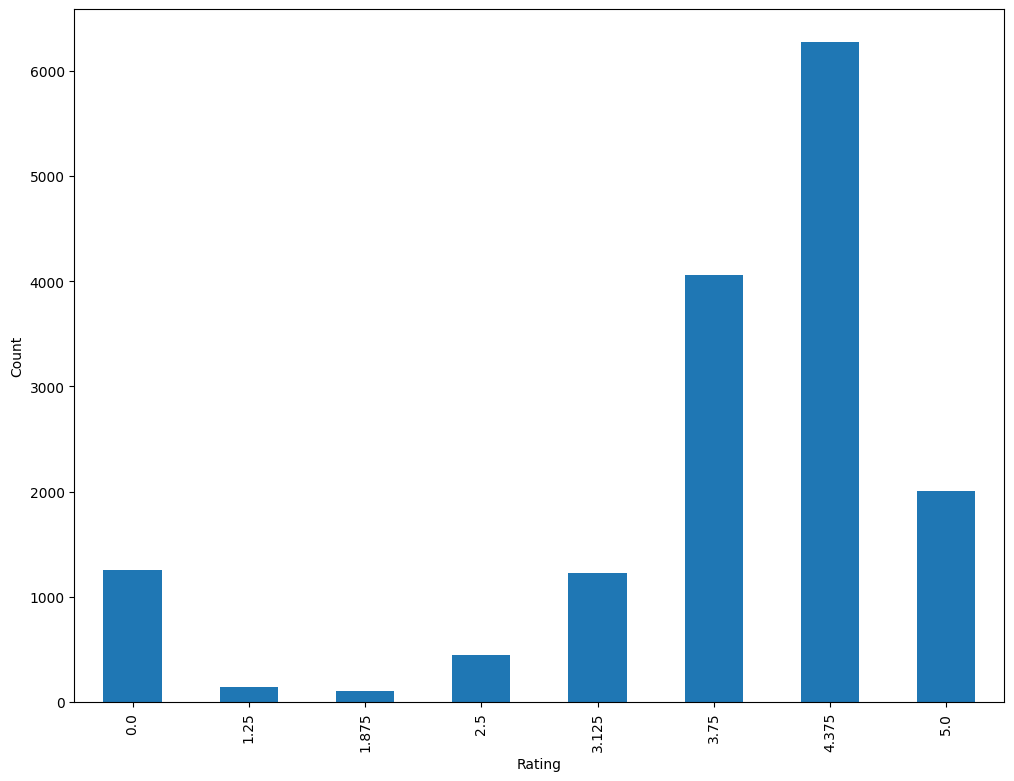

In [20]:
df.rating.value_counts().sort_index().plot(kind='bar', xlabel='Rating', ylabel='Count', figsize=(12, 9));

# Прогноз

## Регрессия

In [16]:
X = df.drop(columns=['rating'])
y = df['rating']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [18]:
y_train.value_counts(normalize=True).sort_index()

0.000    0.080909
1.250    0.008945
1.875    0.006689
2.500    0.028769
3.125    0.079378
3.750    0.261826
4.375    0.404303
5.000    0.129180
Name: rating, dtype: float64

In [19]:
y_test.value_counts(normalize=True).sort_index()

0.000    0.080889
1.250    0.009024
1.875    0.006768
2.500    0.028682
3.125    0.079278
3.750    0.261682
4.375    0.404447
5.000    0.129230
Name: rating, dtype: float64

### LinearRegression

In [21]:
param_grid = {'fit_intercept': (True, False)}

lin_reg = GridSearchCV(estimator=LinearRegression(),
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       n_jobs=-1)
lin_reg.fit(X_train, y_train)
lin_reg.best_params_, lin_reg.best_score_

({'fit_intercept': True}, -2.9275087768482207e+22)

In [22]:
print('RMSE LinearRegression на тесте:', math.sqrt(mean_squared_error(y_test, lin_reg.best_estimator_.predict(X_test))))

RMSE LinearRegression на тесте: 1.2387249807151004


### DecisionTreeRegressor

In [25]:
param_grid = {'max_depth' : range(1, 100)}
dt_reg = GridSearchCV(estimator=DecisionTreeRegressor(), 
                      param_grid=param_grid,
                      n_jobs=-1,
                      cv=5,
                      scoring='neg_mean_squared_error')
dt_reg.fit(X_train, y_train)
dt_reg.best_params_, dt_reg.best_score_

({'max_depth': 2}, -1.6174855208077745)

In [26]:
print('RMSE DecisionTreeRegressor на тесте:', math.sqrt(mean_squared_error(y_test, dt_reg.best_estimator_.predict(X_test))))

RMSE DecisionTreeRegressor на тесте: 1.270514577302714


### RandomForestRegressor

In [27]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
rf_reg = GridSearchCV(estimator=RandomForestRegressor(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      scoring='neg_mean_squared_error', 
                      n_jobs=-1)
rf_reg.fit(X_train, y_train)
rf_reg.best_params_, rf_reg.best_score_

({'max_depth': 5, 'n_estimators': 100}, -1.6008375026702937)

In [28]:
print('RMSE RandomForestRegressor на тесте:', math.sqrt(mean_squared_error(y_test, rf_reg.best_estimator_.predict(X_test))))

RMSE RandomForestRegressor на тесте: 1.260579059582145


### SVR

In [29]:
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
              'C': (0.1, 1, 10)}
svr = GridSearchCV(estimator=SVR(),
                      param_grid=param_grid, 
                      cv=5,
                      scoring='neg_mean_squared_error')
svr.fit(X_train, y_train)
svr.best_params_, svr.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, -1.7016849608428894)

In [30]:
print('RMSE SVR на тесте:', math.sqrt(mean_squared_error(y_test, svr.best_estimator_.predict(X_test))))

RMSE SVR на тесте: 1.3017944436276825


### GradientBoostingRegressor

In [31]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
gb_reg = GridSearchCV(estimator=GradientBoostingRegressor(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      scoring='neg_mean_squared_error', 
                      n_jobs=-1)
gb_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': (1, 2, 5, 10, 15, 20),
                         'n_estimators': range(10, 101, 10)},
             scoring='neg_mean_squared_error')

In [32]:
gb_reg.best_params_, gb_reg.best_score_

({'max_depth': 2, 'n_estimators': 100}, -1.5824737179539747)

In [33]:
print('RMSE GradientBoostingRegressor на тесте:', math.sqrt(mean_squared_error(y_test, gb_reg.best_estimator_.predict(X_test))))

RMSE GradientBoostingRegressor на тесте: 1.251648674424281


### VotingRegressor

In [34]:
best_RMSE = np.inf
best_params = 0
for weight_1 in range(1, 3):
      for weight_2 in range(1, 3):
        for weight_3 in range(1, 3):
            vr = VotingRegressor(estimators=[('SVR', SVR(C=1,
                                                         gamma='scale',
                                                         kernel='rbf')),
                                             ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),
                                             ('RandomForestRegressor', RandomForestRegressor(random_state=21, 
                                                                                             max_depth=5,
                                                                                             n_estimators=100, 
                                                                                             n_jobs=-1))],
                                 weights=[weight_1, weight_2, weight_3],
                                 n_jobs=-1)
            RMSE = math.sqrt(abs(cross_val_score(vr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()))
            if RMSE < best_RMSE:
                best_RMSE = RMSE
                best_params = {'weights': [weight_1, weight_2, weight_3]}


print(f'Best params: {best_params}, RMSE is {best_RMSE}')

Best params: {'weights': [1, 1, 2]}, RMSE is 1.26560411173867


In [35]:
vr = VotingRegressor(estimators=[('SVR', SVR(C=1, 
                                             gamma='scale', 
                                             kernel='rbf')),
                                               ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),
                                               ('RandomForestRegressor', RandomForestRegressor(random_state=21, 
                                                                                               max_depth=5, 
                                                                                               n_estimators=100, 
                                                                                               n_jobs=-1))],
                                   weights=[1, 1, 2],
                                   n_jobs=-1)
vr.fit(X_train, y_train)
print('RMSE VotingRegressor на тесте:', math.sqrt(mean_squared_error(y_test, vr.predict(X_test))))

RMSE VotingRegressor на тесте: 1.2620493861319557


### BaggingRegressor

In [95]:
best_RMSE = np.inf
best_n_estimators = 0
for n_estimators in (1, 2, 5, 10):
    br = BaggingRegressor(base_estimator=SVR(C=1, gamma='scale', kernel='rbf'), 
                          n_estimators=n_estimators, 
                          random_state=21, 
                          n_jobs=-1)
    RMSE = math.sqrt(abs(cross_val_score(br, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()))
    print(f'n_estimators: {n_estimators}, RMSE is {RMSE}')
    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, RMSE is {best_RMSE}')


n_estimators: 1, RMSE is 1.3046575472077542
n_estimators: 2, RMSE is 1.2982030685040655
n_estimators: 5, RMSE is 1.2938038138768597
n_estimators: 10, RMSE is 1.2919095249396917
Best n_estimators: 10, RMSE is 1.2919095249396917



In [96]:
br = BaggingRegressor(base_estimator=SVR(C=1, gamma='scale', kernel='rbf'), 
                      n_estimators=10, 
                      random_state=21, 
                      n_jobs=-1)
br.fit(X_train, y_train)
print('RMSE BaggingRegressor на тесте:', math.sqrt(mean_squared_error(y_test, br.predict(X_test))))

RMSE BaggingRegressor на тесте: 1.2857630078195812


### StackingRegressor

In [97]:
best_RMSE = np.inf
best_passthrough = True
for passthrough in [True, False]:
    sr = StackingRegressor(estimators=[('SVR', SVR(C=1, gamma='scale', kernel='rbf')),
                                       ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),
                                       ('RandomForestRegressor', RandomForestRegressor(random_state=21, 
                                                                                       max_depth=5, 
                                                                                       n_estimators=100, 
                                                                                       n_jobs=-1))],
                           final_estimator=LinearRegression(),
                           cv=5, 
                           passthrough=passthrough, n_jobs=-1)
    sr.fit(X_train, y_train)
    RMSE = math.sqrt(mean_squared_error(y_train, br.predict(X_train)))
    if RMSE < best_RMSE:
        best_RMSE = RMSE
        best_passthrough = passthrough

print(f'Best passthrough: {best_passthrough}, RMSE is {best_RMSE}')

Best passthrough: True, RMSE is 1.1364201753115195


In [98]:
sr = StackingRegressor(estimators=[('SVR', SVR(C=1, gamma='scale', kernel='rbf')),
                                   ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=2)),
                                   ('RandomForestRegressor', RandomForestRegressor(random_state=21, 
                                                                                   max_depth=5, 
                                                                                   n_estimators=100, 
                                                                                   n_jobs=-1))],
                       final_estimator=LinearRegression(),
                       passthrough=True, 
                       n_jobs=-1)
sr.fit(X_train, y_train)
print('RMSE StackingRegressor на тесте:', math.sqrt(mean_squared_error(y_test, sr.predict(X_test))))

RMSE StackingRegressor на тесте: 1.2534628344892764


### Наивный регрессор

In [122]:
y_pred = np.full(len(y_test), y_train.mean())
print(f'RMSE наивного регрессора на тесте {math.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE наивного регрессора на тесте 1.2855988043750544


### Лучший регрессор

In [91]:
print("SVR с параметрами {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, RMSE = 1.1875")

SVR с параметрами {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, RMSE = 1.1875


## Классификация 6 классов

In [28]:
X = df.drop(columns=['rating'])
y = df['rating'].round()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [30]:
y_train.value_counts(normalize=True).sort_index()

0.0    0.080909
1.0    0.008945
2.0    0.035458
3.0    0.079378
4.0    0.666129
5.0    0.129180
Name: rating, dtype: float64

In [31]:
y_test.value_counts(normalize=True).sort_index()

0.0    0.080889
1.0    0.009024
2.0    0.035450
3.0    0.079278
4.0    0.666130
5.0    0.129230
Name: rating, dtype: float64

### LogisticRegression

In [82]:
param_grid = {'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'C': (0.1, 1, 10),
              'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'l1_ratio': [0.5],
              'fit_intercept': (True, False)}

log_reg = GridSearchCV(estimator=LogisticRegression(random_state=21, n_jobs=-1),
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1)
log_reg.fit(X_train, y_train)
log_reg.best_params_, log_reg.best_score_

({'C': 1,
  'fit_intercept': True,
  'l1_ratio': 0.5,
  'penalty': 'l1',
  'solver': 'saga'},
 0.6713112287548892)

In [83]:
print('Accuracy LogisticRegression на тесте:', accuracy_score(y_test, log_reg.best_estimator_.predict(X_test)))

Accuracy LogisticRegression на тесте: 0.6684922680412371


### DecisionTreeClassifier

In [85]:
param_grid = {'max_depth' : range(1, 100)}
dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=param_grid,
                      n_jobs=-1,
                      cv=5)
dt_clf.fit(X_train, y_train)
dt_clf.best_params_, dt_clf.best_score_

({'max_depth': 3}, 0.6695392436685402)

In [86]:
print('Accuracy DecisionTreeClassifier на тесте:', accuracy_score(y_test, dt_clf.best_estimator_.predict(X_test)))

Accuracy DecisionTreeClassifier на тесте: 0.666881443298969


### RandomForestClassifier

In [87]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5, 
                      n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_clf.best_params_, rf_clf.best_score_

({'max_depth': 15, 'n_estimators': 100}, 0.669700371544214)

In [88]:
print('Accuracy RandomForestClassifier на тесте:', accuracy_score(y_test, rf_clf.best_estimator_.predict(X_test)))

Accuracy RandomForestClassifier на тесте: 0.6688144329896907


### SVC

In [89]:
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
              'C': (0.1, 1, 10)}
svc = GridSearchCV(estimator=SVC(),
                      param_grid=param_grid, 
                      cv=5)
svc.fit(X_train, y_train)
svc.best_params_, svc.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, 0.6704252686383348)

In [90]:
print('Accuracy SVC на тесте:', accuracy_score(y_test, svc.best_estimator_.predict(X_test)))

Accuracy SVC на тесте: 0.6707474226804123


### GradientBoostingClassifier

In [92]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
gb_clf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      n_jobs=-1)
gb_clf.fit(X_train, y_train)
gb_clf.best_params_, gb_clf.best_score_

({'max_depth': 1, 'n_estimators': 80}, 0.6698614021400272)

In [93]:
print('Accuracy GradientBoostingClassifier на тесте:', accuracy_score(y_test, gb_clf.best_estimator_.predict(X_test)))

Accuracy GradientBoostingClassifier на тесте: 0.6694587628865979


### VotingClassifier

In [33]:
best_accuracy = 0
best_params = 0
for voting in ('hard', 'soft'):
    for weight_1 in range(1, 3):
        for weight_2 in range(1, 3):
            for weight_3 in range(1, 3):
                vc = VotingClassifier(estimators=[('SVC', SVC(C=1, 
                                                              gamma='scale', 
                                                              kernel='rbf')),
                                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                                            fit_intercept=True,
                                                                                            l1_ratio=0.5,
                                                                                            penalty='l1',
                                                                                            solver='saga')),
                                                  ('RandomForestClassifier', RandomForestClassifier(random_state=21, 
                                                                                                    max_depth=15, 
                                                                                                    n_estimators=100, 
                                                                                                    n_jobs=-1))],
                                      weights=[weight_1, weight_2, weight_3],
                                      n_jobs=-1)
                accuracy = cross_val_score(vc, X_train, y_train, cv=5).mean()
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'voting': voting, 'weights': [weight_1, weight_2, weight_3]}


print(f'Best params: {best_params}, accuracy is {best_accuracy}')

Best params: {'voting': 'hard', 'weights': [1, 2, 2]}, accuracy is 0.6709084901322552


In [35]:
vc = VotingClassifier(estimators=[('SVC', SVC(C=1,
                                              gamma='scale',
                                              kernel='rbf')),
                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                            fit_intercept=True,
                                                                            l1_ratio=0.5,
                                                                            penalty='l1',
                                                                            solver='saga')),
                                  ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                    max_depth=15,
                                                                                    n_estimators=100, 
                                                                                    n_jobs=-1))],
                      weights=[1, 2, 2],
                      voting='hard',
                      n_jobs=-1)
vc.fit(X_train, y_train)
print('Accuracy VotingClassifier на тесте:', accuracy_score(y_test, vc.predict(X_test)))

Accuracy VotingClassifier на тесте: 0.6684922680412371


### BaggingClassifier

In [32]:
best_accuracy = 0
best_n_estimators = 0
for n_estimators in (1, 2, 5, 10):
    bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='rbf'), 
                           n_estimators=n_estimators, 
                           random_state=21, 
                           n_jobs=-1)
    accuracy = cross_val_score(bc, X_train, y_train, cv=5).mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, accuracy is {best_accuracy}')

Best n_estimators: 2, accuracy is 0.6708036354294248


In [34]:
bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='rbf'), 
                       n_estimators=2, 
                       random_state=21, 
                       n_jobs=-1)
bc.fit(X_train, y_train)
print('Accuracy BaggingClassifier на тесте:', accuracy_score(y_test, bc.predict(X_test)))

Accuracy BaggingClassifier на тесте: 0.6664518208185627


### StackingClassifier

In [36]:
best_accuracy = 0
best_passthrough = True
for passthrough in [True, False]:
    sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                    gamma='scale',
                                                    kernel='rbf')),
                                        ('LogisticRegression', LogisticRegression(C=1,
                                                                                  fit_intercept=True,
                                                                                  l1_ratio=0.5,
                                                                                  penalty='l1',
                                                                                  solver='saga')),
                                        ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                          max_depth=15,
                                                                                          n_estimators=100,
                                                                                          n_jobs=-1))],
                            final_estimator=DecisionTreeClassifier(),
                            cv=5,
                            passthrough=passthrough, 
                            n_jobs=-1)
    sc.fit(X_train, y_train)
    accuracy = accuracy_score(y_train, sc.predict(X_train))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_passthrough = passthrough

print(f'Best passthrough: {best_passthrough}, accuracy is {best_accuracy}')

Best passthrough: True, accuracy is 0.5479220360824743


In [37]:
sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                gamma='scale',
                                                kernel='rbf')),
                                    ('LogisticRegression', LogisticRegression(C=1,
                                                                              fit_intercept=True,
                                                                              l1_ratio=0.5,
                                                                              penalty='l1',
                                                                              solver='saga')),
                                    ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                      max_depth=15,
                                                                                      n_estimators=100,
                                                                                      n_jobs=-1))],
                        final_estimator=DecisionTreeClassifier(),
                        cv=5,
                        passthrough=True, 
                        n_jobs=-1)
sc.fit(X_train, y_train)
print('Accuracy StackingClassifier на тесте:', accuracy_score(y_test, sc.predict(X_test)))

Accuracy StackingClassifier на тесте: 0.5032216494845361


### Наивный классификатор

In [125]:
y_pred = np.full(len(y_test), y_train.mode())
print(f'Accuracy наивного регрессора на тесте {accuracy_score(y_test, y_pred)}')

Accuracy наивного регрессора на тесте 0.6659149484536082


### Лучший классификатор

In [62]:
print("SVC с параметрами {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy = 0.6707474226804123")

SVC с параметрами {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy = 0.6707474226804123


## Классификация 3 класса

In [21]:
def binarize(y):
    if y in (0, 1):
        return 'bad'
    if y in (2, 3):
        return 'so-so'
    return 'great'

In [22]:
X = df.drop(columns=['rating'])
y = df['rating'].round().apply(binarize)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [24]:
y_train.value_counts(normalize=True).sort_index()

bad      0.089854
great    0.795310
so-so    0.114836
Name: rating, dtype: float64

In [25]:
y_test.value_counts(normalize=True).sort_index()

bad      0.089913
great    0.795359
so-so    0.114728
Name: rating, dtype: float64

### LogisticRegression

In [131]:
param_grid = {'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'C': (0.1, 1, 10),
              'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'l1_ratio': [0.5],
              'fit_intercept': (True, False)}

log_reg = GridSearchCV(estimator=LogisticRegression(random_state=21, n_jobs=-1),
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1)
log_reg.fit(X_train, y_train)
log_reg.best_params_, log_reg.best_score_

({'C': 0.1,
  'fit_intercept': True,
  'l1_ratio': 0.5,
  'penalty': 'l2',
  'solver': 'newton-cg'},
 0.7964723404172528)

In [132]:
print('Accuracy LogisticRegression на тесте:', accuracy_score(y_test, log_reg.best_estimator_.predict(X_test)))

Accuracy LogisticRegression на тесте: 0.7973582474226805


### DecisionTreeClassifier

In [134]:
param_grid = {'max_depth' : range(1, 100)}
dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=param_grid,
                      n_jobs=-1,
                      cv=5)
dt_clf.fit(X_train, y_train)
dt_clf.best_params_, dt_clf.best_score_

({'max_depth': 1}, 0.7968751114665069)

In [135]:
print('Accuracy DecisionTreeClassifier на тесте:', accuracy_score(y_test, dt_clf.best_estimator_.predict(X_test)))

Accuracy DecisionTreeClassifier на тесте: 0.7976804123711341


### RandomForestClassifier

In [136]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5, 
                      n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_clf.best_params_, rf_clf.best_score_

({'max_depth': 20, 'n_estimators': 50}, 0.7958280234742788)


In [139]:
print('Accuracy RandomForestClassifier на тесте:', accuracy_score(y_test, rf_clf.best_estimator_.predict(X_test)))

Accuracy RandomForestClassifier на тесте: 0.7957474226804123


### SVC

In [52]:
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
              'C': (0.1, 1, 10)}
svc = GridSearchCV(estimator=SVC(),
                      param_grid=param_grid, 
                      cv=5)
svc.fit(X_train, y_train)
svc.best_params_, svc.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, 0.7965529205683997)


In [53]:
print('Accuracy SVC на тесте:', accuracy_score(y_test, svc.best_estimator_.predict(X_test)))

Accuracy SVC на тесте: 0.7980025773195877


### GradientBoostingClassifier

In [65]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
gb_clf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      n_jobs=-1)
gb_clf.fit(X_train, y_train)
gb_clf.best_params_, gb_clf.best_score_

({'max_depth': 2, 'n_estimators': 90}, 0.795989021643472)


In [66]:
print('Accuracy GradientBoostingClassifier на тесте:', accuracy_score(y_test, gb_clf.best_estimator_.predict(X_test)))

Accuracy GradientBoostingClassifier на тесте: 0.7989690721649485


### VotingClassifier

In [2]:
best_accuracy = 0
best_params = 0
for voting in ('hard', 'soft'):
    for weight_1 in range(1, 3):
        for weight_2 in range(1, 3):
            for weight_3 in range(1, 3):
                vc = VotingClassifier(estimators=[('SVC', SVC(C=1, 
                                                              gamma='scale', 
                                                              kernel='rbf')),
                                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                                            fit_intercept=True,
                                                                                            l1_ratio=0.5,
                                                                                            penalty='l1',
                                                                                            solver='saga')),
                                                  ('RandomForestClassifier', RandomForestClassifier(random_state=21, 
                                                                                                    max_depth=15, 
                                                                                                    n_estimators=100, 
                                                                                                    n_jobs=-1))],
                                      weights=[weight_1, weight_2, weight_3],
                                      n_jobs=-1)
                accuracy = cross_val_score(vc, X_train, y_train, cv=5).mean()
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'voting': voting, 'weights': [weight_1, weight_2, weight_3]}

Best params: {'voting': 'hard', 'weights': [2, 1, 1]}, accuracy is 0.796472372843873


In [23]:
vc = VotingClassifier(estimators=[('SVC', SVC(C=1,
                                              gamma='scale',
                                              kernel='rbf')),
                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                            fit_intercept=True,
                                                                            l1_ratio=0.5,
                                                                            penalty='l1',
                                                                            solver='saga')),
                                  ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                    max_depth=15, 
                                                                                    n_estimators=100, 
                                                                                    n_jobs=-1))],
                                      weights=[2, 1, 1],
                                      n_jobs=-1)
vc.fit(X_train, y_train)
print('Accuracy VotingClassifier на тесте:', accuracy_score(y_test, vc.predict(X_test)))

Accuracy VotingClassifier на тесте: 0.7969706735417338


### BaggingClassifier

In [26]:
best_accuracy = 0
best_n_estimators = 0
for n_estimators in (1, 2, 5, 10):
    bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='rbf'), 
                           n_estimators=n_estimators, 
                           random_state=21, 
                           n_jobs=-1)
    accuracy = cross_val_score(bc, X_train, y_train, cv=5).mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, accuracy is {best_accuracy}')

Best n_estimators: 10, accuracy is 0.7962307620969128


In [27]:
bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='rbf'),
                       n_estimators=10,
                       random_state=21,
                       n_jobs=-1)
bc.fit(X_train, y_train)
print('Accuracy BaggingClassifier на тесте:', accuracy_score(y_test, bc.predict(X_test)))

Accuracy BaggingClassifier на тесте: 0.7979374798582017


### StackingClassifier

In [24]:
best_accuracy = 0
best_passthrough = True
for passthrough in [True, False]:
    sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                    gamma='scale',
                                                    kernel='rbf')),
                                        ('LogisticRegression', LogisticRegression(C=1,
                                                                                  fit_intercept=True,
                                                                                  l1_ratio=0.5,
                                                                                  penalty='l1',
                                                                                  solver='saga')),
                                        ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                          max_depth=15,
                                                                                          n_estimators=100,
                                                                                          n_jobs=-1))],
                            final_estimator=DecisionTreeClassifier(),
                            cv=5,
                            passthrough=passthrough, 
                            n_jobs=-1)
    sc.fit(X_train, y_train)
    accuracy = accuracy_score(y_train, sc.predict(X_train))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_passthrough = passthrough

print(f'Best passthrough: {best_passthrough}, accuracy is {best_accuracy}')

Best passthrough: True, accuracy is 0.7061809976629866


In [25]:
sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                gamma='scale',
                                                kernel='rbf')),
                                    ('LogisticRegression', LogisticRegression(C=1,
                                                                              fit_intercept=True,
                                                                              l1_ratio=0.5,
                                                                              penalty='l1',
                                                                              solver='saga')),
                                    ('RandomForestClassifier', RandomForestClassifier(random_state=21,
                                                                                      max_depth=15, 
                                                                                      n_estimators=100, 
                                                                                      n_jobs=-1))],
                      final_estimator=DecisionTreeClassifier(),
                      cv=5,
                      passthrough=True,
                      n_jobs=-1)
sc.fit(X_train, y_train)
print('Accuracy StackingClassifier на тесте:', accuracy_score(y_test, sc.predict(X_test)))

Accuracy StackingClassifier на тесте: 0.6629068643248469


### Наивный классификатор

In [47]:
y_pred = np.full(len(y_test), y_train.mode())
print(f'Accuracy наивного регрессора на тесте {accuracy_score(y_test, y_pred)}')

Accuracy наивного регрессора на тесте 0.7953593296809539


### Лучший классификатор

In [67]:
print("GradientBoostingClassifier с параметрами {'max_depth': 2, 'n_estimators': 90}, Accuracy = 0.7989690721649485")

GradientBoostingClassifier с параметрами {'max_depth': 2, 'n_estimators': 90}, Accuracy = 0.7989690721649485


### Выбор новой метрики

Если спрогнозировать плохой рейтинг, который на самом деле окажется хорошим, то пользователь сможет с легкостью ввести новый список продуктов и найти другой рецепт. 

Если спрогнозировать хороший рейтинг, который на самом деле окажется плохим, то пользователь потратит время на приготовление плохого рецепта, потратит продукты, останется голоден и огорчен.

Поэтому метрику accuracy следует заменить метрикой precision. Модель нужно выбрать с самой высокой precision по классу great.

## Классификация 3 класса с метрикой precision по классу great

In [26]:
precision_great = make_scorer(precision_score, average='weighted')

### LogisticRegression

In [50]:
param_grid = {'penalty': ('l1', 'l2', 'elasticnet', 'none'),
              'C': (0.1, 1, 10),
              'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'l1_ratio': [0.5],
              'fit_intercept': (True, False)}

log_reg = GridSearchCV(estimator=LogisticRegression(random_state=21, n_jobs=-1),
                       param_grid=param_grid,
                       cv=5,
                       scoring=precision_great,
                       n_jobs=-1)
log_reg.fit(X_train, y_train)
log_reg.best_params_, log_reg.best_score_

({'C': 1,
  'fit_intercept': True,
  'l1_ratio': 0.5,
  'penalty': 'l2',
  'solver': 'newton-cg'},
 0.7071846843884967)

In [51]:
print('Precision LogisticRegression на тесте:', precision_score(y_test, log_reg.best_estimator_.predict(X_test), average='weighted'))

Precision LogisticRegression на тесте: 0.6947081142919056


### DecisionTreeClassifier

In [54]:
param_grid = {'max_depth' : range(1, 100)}
dt_clf = GridSearchCV(estimator=DecisionTreeClassifier(), 
                      param_grid=param_grid,
                      n_jobs=-1,
                      scoring=precision_great,
                      cv=5)
dt_clf.fit(X_train, y_train)
dt_clf.best_params_, dt_clf.best_score_

({'max_depth': 11}, 0.6983336091514285)

In [55]:
print('Precision DecisionTreeClassifier на тесте:', precision_score(y_test, dt_clf.best_estimator_.predict(X_test), average='weighted'))

Precision DecisionTreeClassifier на тесте: 0.6820767944549524


### RandomForestClassifier

In [58]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
rf_clf = GridSearchCV(estimator=RandomForestClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      scoring=precision_great,
                      n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_clf.best_params_, rf_clf.best_score_

({'max_depth': 10, 'n_estimators': 10}, 0.692216269296305)

In [59]:
print('Precision RandomForestClassifier на тесте:', precision_score(y_test, rf_clf.best_estimator_.predict(X_test), average='weighted'))

Precision RandomForestClassifier на тесте: 0.6777044673768081


### SVC

In [68]:
param_grid = {'kernel': ('poly', 'rbf', 'sigmoid'),
              'gamma': ('scale', 'auto'),
              'C': (0.1, 1, 10)}
svc = GridSearchCV(estimator=SVC(),
                   param_grid=param_grid, 
                   scoring=precision_great,
                   cv=5)
svc.fit(X_train, y_train)
svc.best_params_, svc.best_score_

({'C': 1, 'gamma': 'scale', 'kernel': 'poly'}, 0.6950420146203853)

In [69]:
print('Precision SVC на тесте:', precision_score(y_test, svc.best_estimator_.predict(X_test), average='weighted'))

Precision SVC на тесте: 0.7042814396199809


### GradientBoostingClassifier

In [70]:
param_grid = {'n_estimators' : range(10, 101, 10),
              'max_depth' : (1, 2, 5, 10, 15, 20)}
gb_clf = GridSearchCV(estimator=GradientBoostingClassifier(random_state=21),
                      param_grid=param_grid, 
                      cv=5,
                      scoring=precision_great,
                      n_jobs=-1)
gb_clf.fit(X_train, y_train)
gb_clf.best_params_, gb_clf.best_score_

({'max_depth': 5, 'n_estimators': 80}, 0.6934913056167012)


In [71]:
print('Precision GradientBoostingClassifier на тесте:', precision_score(y_test, gb_clf.best_estimator_.predict(X_test), average='weighted'))

Precision GradientBoostingClassifier на тесте: 0.7164741951157683


### VotingClassifier

In [50]:
best_precision = 0
best_params = 0
for voting in ('hard', 'soft'):
    for weight_1 in range(1, 3):
        for weight_2 in range(1, 3):
            for weight_3 in range(1, 3):
                vc = VotingClassifier(estimators=[('SVC', SVC(C=1, 
                                                              gamma='scale', 
                                                              kernel='poly')),
                                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                                            fit_intercept=True,
                                                                                            l1_ratio=0.5,
                                                                                            penalty='l2',
                                                                                            solver='newton-cg')),
                                                  ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=15))],
                                      voting=voting,
                                      weights=[weight_1, weight_2, weight_3],
                                      n_jobs=-1)
                precision = cross_val_score(vc, X_train, y_train, cv=5, scoring=precision_great).mean()
                if precision > best_precision:
                    best_precision = precision
                    best_params = {'voting': voting, 'weights': [weight_1, weight_2, weight_3]}


print(f'Best params: {best_params}, precision is {best_precision}')

Best params: {'voting': 'hard', 'weights': [1, 1, 2]}, precision is 0.6960425915902002


In [73]:
vc = VotingClassifier(estimators=[('SVC', SVC(C=1,
                                              gamma='scale',
                                              kernel='poly')),
                                  ('LogisticRegression', LogisticRegression(C=1,
                                                                            fit_intercept=True,
                                                                            l1_ratio=0.5,
                                                                            penalty='l2',
                                                                            solver='newton-cg')),
                                  ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=15))],
                      voting='hard',
                      weights=[1, 1, 2],
                      n_jobs=-1)
vc.fit(X_train, y_train)
print('Precision VotingClassifier на тесте:', precision_score(y_test, vc.predict(X_test), average='weighted'))

Precision VotingClassifier на тесте: 0.6786800333326283


### BaggingClassifier

In [52]:
best_precision = 0
best_n_estimators = 0
for n_estimators in (1, 2, 5, 10):
    bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='poly'), 
                           n_estimators=n_estimators, 
                           random_state=21, 
                           n_jobs=-1)
    precision = cross_val_score(bc, X_train, y_train, cv=5, scoring=precision_great).mean()
    if precision > best_precision:
        best_precision = precision
        best_n_estimators = n_estimators

print(f'Best n_estimators: {best_n_estimators}, precision is {best_precision}')

Best n_estimators: 10, precision is 0.6938419971814878


In [53]:
bc = BaggingClassifier(base_estimator=SVC(C=1, gamma='scale', kernel='poly'), 
                           n_estimators=10, 
                           random_state=21, 
                           n_jobs=-1)
bc.fit(X_train, y_train)
print('Precision BaggingClassifier на тесте:', precision_score(y_test, bc.predict(X_test), average='weighted'))

Precision BaggingClassifier на тесте: 0.6968111993095194


### StackingClassifier

In [74]:
best_precision = 0
best_passthrough = True
for passthrough in [True, False]:
    sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                    gamma='scale',
                                                    kernel='poly')),
                                        ('LogisticRegression', LogisticRegression(C=1,
                                                                                  fit_intercept=True,
                                                                                  l1_ratio=0.5,
                                                                                  penalty='l2',
                                                                                  solver='newton-cg')),
                                                  ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=15))],
                            final_estimator=RandomForestClassifier(random_state=21),
                            cv=5,
                            passthrough=passthrough, 
                            n_jobs=-1)
    sc.fit(X_train, y_train)
    precision = precision_score(y_train, sc.predict(X_train), average='weighted')
    if precision > best_precision:
        best_precision = precision
        best_passthrough = passthrough

print(f'Best passthrough: {best_passthrough}, precision is {best_precision}')

Best passthrough: True, precision is 0.8217965928265089


In [75]:
sc = StackingClassifier(estimators=[('SVC', SVC(C=1,
                                                gamma='scale',
                                                kernel='poly')),
                                    ('LogisticRegression', LogisticRegression(C=1,
                                                                              fit_intercept=True,
                                                                              l1_ratio=0.5,
                                                                              penalty='l2',
                                                                              solver='newton-cg')),
                                    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=15))],
                        final_estimator=RandomForestClassifier(random_state=21),
                        cv=5,
                        passthrough=True, 
                        n_jobs=-1)
sc.fit(X_train, y_train)
print('Precision StackingClassifier на тесте:', precision_score(y_test, sc.predict(X_test), average='weighted'))

Precision StackingClassifier на тесте: 0.6863360628568337


### Наивный классификатор

In [57]:
y_pred = np.full(len(y_test), y_train.mode())
print(f'Precision наивного регрессора на тесте {precision_score(y_test, y_pred, average="weighted")}')

Precision наивного регрессора на тесте 0.6325964633105363


### Лучший классификатор

Для основной программы выберу GradientBoostingClassifier с параметрами max_depth=5, n_estimators=80, он показал лучшую метрику precision на тестовой части.

In [27]:
best_model = GradientBoostingClassifier(random_state=21, max_depth=5, n_estimators=80)
best_model.fit(X_train, y_train)
precision_score(y_test, best_model.predict(X_test), average='weighted')

0.705306056292205

In [30]:
dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [31]:
best_model_1 = load('best_model.joblib')
precision_score(y_test, best_model_1.predict(X_test), average='weighted')

0.705306056292205

# Пищевая ценность

In [126]:
nutrients = pd.read_csv('daily_nutrients_norm.csv')
nutrients

,nutrient,value,nutrient_api
0,Fat,38.0,Total lipid (fat)
1,Saturated fat,20.0,"Fatty acids, total saturated"
2,Cholesterol,300.0,Cholesterol
3,Total carbohydrates,275.0,"Carbohydrate, by difference"
4,Sodium,2300.0,"Sodium, Na"
5,Dietary Fiber,28.0,"Fiber, total dietary"
6,Protein,50.0,Protein
7,Added sugars,50.0,"Sugars, added"
8,Vitamin A,900.0,"Vitamin A, RAE"
9,Vitamin C,90.0,"Vitamin C, total ascorbic acid"


In [43]:
for ingredient in df.drop(columns=['rating']).columns:
    url = f'https://api.nal.usda.gov/fdc/v1/foods/search?api_key=CjmrTAqzHTAB7oageykkfg14EMb48Z3d9TTeEGkt&query={ingredient}'
    res = requests.get(url).json()
    try:
        nutrients_info = res['foods'][0]['foodNutrients']
        nutrients_all = {}
        for nutrient_info in nutrients_info:
            nutrients_all[nutrient_info['nutrientName']] = nutrient_info['value']
        selected_nutrients = []
        for nutrient_api in nutrients.nutrient_api:
            selected_nutrients.append(nutrients_all.get(nutrient_api, 0.0))
        nutrients[ingredient] = selected_nutrients
    except:
        print(f'Информация о ингредиенте {ingredient} отсутствует')

In [142]:
nutrients

,nutrient,value,nutrient_api,almond,amaretto,anchovy,anise,apple,apple juice,apricot,...,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey
0,Fat,38.0,Total lipid (fat),55.500,10.00,9.710,15.900,0.65,0.00,0.0,...,0.25,0.000,0.000,1.110,0.000,0.00,2.94,0.00,0.00,1.27
1,Saturated fat,20.0,"Fatty acids, total saturated",6.550,3.33,2.200,0.586,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.00,1.76,0.00,0.00,0.42
2,Cholesterol,300.0,Cholesterol,0.000,0.00,85.000,0.000,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.00,12.00,0.00,0.00,34.00
3,Total carbohydrates,275.0,"Carbohydrate, by difference",18.800,33.30,0.000,50.000,14.30,14.60,13.5,...,7.45,0.000,2.600,77.800,5.000,4.08,15.90,18.90,4.21,6.78
4,Sodium,2300.0,"Sodium, Na",227.000,67.00,3670.000,16.000,0.00,0.00,6.0,...,0.00,1.000,5.000,0.000,2.000,0.00,41.00,525.00,0.00,521.00
5,Dietary Fiber,28.0,"Fiber, total dietary",10.300,0.00,0.000,14.600,3.20,0.00,0.0,...,0.40,0.000,0.000,4.400,0.000,2.00,0.00,0.00,1.10,1.30
6,Protein,50.0,Protein,21.000,0.00,28.900,17.600,0.00,0.42,0.0,...,0.78,0.000,0.070,13.300,0.500,1.02,2.94,0.94,1.05,9.75
7,Added sugars,50.0,"Sugars, added",0.000,33.30,0.000,0.000,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
8,Vitamin A,900.0,"Vitamin A, RAE",0.000,0.00,12.000,16.000,0.00,0.00,0.0,...,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00
9,Vitamin C,90.0,"Vitamin C, total ascorbic acid",0.000,0.00,0.000,21.000,3.10,0.00,17.6,...,0.00,0.000,0.000,0.000,0.000,18.40,0.70,0.00,12.60,0.00


In [156]:
nutrients = nutrients[['nutrient', 'value', 'nutrient_api']].join(nutrients.drop(columns=['nutrient', 'value', 'nutrient_api']).apply(lambda x: x / nutrients['value'] * 100, axis=0))

In [157]:
nutrients.to_csv('nutrients.csv', index=False)

In [158]:
nutrients = pd.read_csv('nutrients.csv')
nutrients

,nutrient,value,nutrient_api,almond,amaretto,anchovy,anise,apple,apple juice,apricot,...,watermelon,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey
0,Fat,38.0,Total lipid (fat),146.052632,26.315789,25.552632,41.842105,1.710526,0.000000,0.000000,...,0.657895,0.000000,0.000000,2.921053,0.000000,0.000000,7.736842,0.000000,0.000000,3.342105
1,Saturated fat,20.0,"Fatty acids, total saturated",32.750000,16.650000,11.000000,2.930000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000,0.000000,0.000000,2.100000
2,Cholesterol,300.0,Cholesterol,0.000000,0.000000,28.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,11.333333
3,Total carbohydrates,275.0,"Carbohydrate, by difference",6.836364,12.109091,0.000000,18.181818,5.200000,5.309091,4.909091,...,2.709091,0.000000,0.945455,28.290909,1.818182,1.483636,5.781818,6.872727,1.530909,2.465455
4,Sodium,2300.0,"Sodium, Na",9.869565,2.913043,159.565217,0.695652,0.000000,0.000000,0.260870,...,0.000000,0.043478,0.217391,0.000000,0.086957,0.000000,1.782609,22.826087,0.000000,22.652174
5,Dietary Fiber,28.0,"Fiber, total dietary",36.785714,0.000000,0.000000,52.142857,11.428571,0.000000,0.000000,...,1.428571,0.000000,0.000000,15.714286,0.000000,7.142857,0.000000,0.000000,3.928571,4.642857
6,Protein,50.0,Protein,42.000000,0.000000,57.800000,35.200000,0.000000,0.840000,0.000000,...,1.560000,0.000000,0.140000,26.600000,1.000000,2.040000,5.880000,1.880000,2.100000,19.500000
7,Added sugars,50.0,"Sugars, added",0.000000,66.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Vitamin A,900.0,"Vitamin A, RAE",0.000000,0.000000,1.333333,1.777778,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Vitamin C,90.0,"Vitamin C, total ascorbic acid",0.000000,0.000000,0.000000,23.333333,3.444444,0.000000,19.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.444444,0.777778,0.000000,14.000000,0.000000


# Похожие рецепты

In [128]:
def get_link(title):
    title = title.rstrip()
    title = unidecode.unidecode(title)
    recipe = title.replace('"','').replace('’','').replace(' ', '%20')
    url = f'https://www.epicurious.com/search/{recipe}'
    page = requests.get(url)
    if page.status_code != 200:
        try:
            return next(search(title, stop=1))
        except:
            print(title)
            return None
    try:
        soup = BeautifulSoup(page.text, "html.parser")
        return 'https://www.epicurious.com' + soup.select('div.results-group article.recipe-content-card a.view-complete-item')[0]['href']
    except:
        try:
            return next(search(title, stop=1))
        except:
            print(title)
            return None

In [129]:
links = []
for title in recipes.title:
    links.append(get_link(title))

In [135]:
recipes['link'] = links

In [20]:
recipes.duplicated().sum()

1774

In [21]:
recipes.drop_duplicates(inplace=True)

In [22]:
recipes.duplicated().sum()

0

In [23]:
recipes.to_csv('recipes.csv', index=False)

In [76]:
recipes = pd.read_csv('recipes.csv')
recipes

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey,link
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,https://www.epicurious.com/recipes/food/views/...
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
18274,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
18275,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,https://www.epicurious.com/recipes/food/views/...
18276,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...


# Меню дня

In [163]:
breakfasts = recipes[(recipes['breakfast'] == 1.0) & 
                     (recipes['rating'] == 5) & 
                     (~recipes.calories.isna())
                    ]
breakfasts

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey,link
105,Apricot-Pistachio Muffins Baked on the Grill,5.0,247.0,5.0,10.0,185.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
271,Breakfast Bowl With Quinoa and Berries,5.0,173.0,5.0,7.0,3.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
427,Haricots Verts With Poached Eggs And Tarragon ...,5.0,314.0,11.0,27.0,484.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
787,Chile-and-Olive-Oil-Fried Egg with Avocado and...,5.0,240.0,9.0,21.0,243.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
845,Shishito Pepper Potato Hash with Fried Eggs,5.0,354.0,16.0,20.0,575.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16307,Maple Blueberry Parfait,5.0,529.0,4.0,19.0,138.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
16394,Skillet Poached Eggs with Prosciutto,5.0,548.0,25.0,40.0,1374.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
17139,Aunt Holly's Banana Bread,5.0,254.0,3.0,7.0,239.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
17531,Savory Spring Vegetable and Goat Cheese Tart,5.0,335.0,11.0,24.0,282.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...


In [165]:
sum(breakfasts.isna().sum())

0

In [167]:
breakfasts['carbohydrates'] = ((breakfasts['calories'] - breakfasts['fat'] * 9 - breakfasts['protein'] * 4) / 4).round()
breakfasts['carbohydrates'] = round(breakfasts['carbohydrates'] / 275 * 100)
breakfasts['protein'] = round(breakfasts['protein'] / 50 * 100)
breakfasts['fat'] = round(breakfasts['fat'] / 38 * 100)
breakfasts['sodium'] = round(breakfasts['sodium'] / 2300 * 100)
breakfasts['calories'] = round(breakfasts['calories'] / 1642 * 100)

In [168]:
breakfasts

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey,link,carbohydrates
105,Apricot-Pistachio Muffins Baked on the Grill,5.0,15.0,10.0,26.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,12.0
271,Breakfast Bowl With Quinoa and Berries,5.0,11.0,10.0,18.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,8.0
427,Haricots Verts With Poached Eggs And Tarragon ...,5.0,19.0,22.0,71.0,21.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,3.0
787,Chile-and-Olive-Oil-Fried Egg with Avocado and...,5.0,15.0,18.0,55.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,1.0
845,Shishito Pepper Potato Hash with Fried Eggs,5.0,22.0,32.0,53.0,25.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16307,Maple Blueberry Parfait,5.0,32.0,8.0,50.0,6.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,31.0
16394,Skillet Poached Eggs with Prosciutto,5.0,33.0,50.0,105.0,60.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,8.0
17139,Aunt Holly's Banana Bread,5.0,15.0,6.0,18.0,10.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,16.0
17531,Savory Spring Vegetable and Goat Cheese Tart,5.0,20.0,22.0,63.0,12.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,7.0


In [169]:
lunches = recipes[(recipes['lunch'] == 1.0) & 
                     (recipes['rating'] == 5) & 
                     (~recipes.calories.isna())
                    ]
lunches

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey,link
19,"Tuna, Asparagus, and New Potato Salad with Chi...",5.0,421.0,10.0,33.0,383.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
133,Radishes with Burrata,5.0,235.0,13.0,19.0,388.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
511,Hamburger Soup,5.0,428.0,24.0,21.0,445.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
512,"Squid Ink Pasta with Shrimp, Nduja, and Tomato",5.0,603.0,31.0,22.0,867.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
535,Wild Mushroom Pierogies,5.0,158.0,3.0,11.0,38.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17403,Farmers' Market Quinoa Salad,5.0,425.0,15.0,27.0,129.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.bonappetit.com/recipe/farmers-mark...
17531,Savory Spring Vegetable and Goat Cheese Tart,5.0,335.0,11.0,24.0,282.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
17562,Clam and Cod Chowder,5.0,560.0,59.0,21.0,1637.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
18118,Tuna Tonnato with Eggplant Salad,5.0,478.0,32.0,27.0,768.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...


In [170]:
sum(lunches.isna().sum())

1

In [171]:
lunches.dropna(inplace=True)

In [172]:
sum(lunches.isna().sum())

0

In [173]:
lunches['carbohydrates'] = ((lunches['calories'] - lunches['fat'] * 9 - lunches['protein'] * 4) / 4).round()
lunches['carbohydrates'] = round(lunches['carbohydrates'] / 275 * 100)
lunches['protein'] = round(lunches['protein'] / 50 * 100)
lunches['fat'] = round(lunches['fat'] / 38 * 100)
lunches['sodium'] = round(lunches['sodium'] / 2300 * 100)
lunches['calories'] = round(lunches['calories'] / 1642 * 100)

In [174]:
lunches

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey,link,carbohydrates
19,"Tuna, Asparagus, and New Potato Salad with Chi...",5.0,26.0,20.0,87.0,17.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,8.0
133,Radishes with Burrata,5.0,14.0,26.0,50.0,17.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,1.0
511,Hamburger Soup,5.0,26.0,48.0,55.0,19.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,13.0
512,"Squid Ink Pasta with Shrimp, Nduja, and Tomato",5.0,37.0,62.0,58.0,38.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,25.0
535,Wild Mushroom Pierogies,5.0,10.0,6.0,29.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17403,Farmers' Market Quinoa Salad,5.0,26.0,30.0,71.0,6.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.bonappetit.com/recipe/farmers-mark...,11.0
17531,Savory Spring Vegetable and Goat Cheese Tart,5.0,20.0,22.0,63.0,12.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,7.0
17562,Clam and Cod Chowder,5.0,34.0,118.0,55.0,71.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,12.0
18118,Tuna Tonnato with Eggplant Salad,5.0,29.0,64.0,71.0,33.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,10.0


In [175]:
dinners = recipes[(recipes['dinner'] == 1.0) & 
                     (recipes['rating'] == 5) & 
                     (~recipes.calories.isna())
                    ]
dinners

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,whiskey,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey,link
53,Pancetta Roast Chicken with Walnut Stuffing,5.0,1203.0,89.0,87.0,583.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
204,Chicken and Sausage Jambalaya,5.0,1117.0,56.0,70.0,1632.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
287,"Rib-Eye Steaks with Radicchio, Pear, and Blue ...",5.0,944.0,50.0,75.0,380.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
414,"Minty, Boozy Chicken",5.0,607.0,36.0,41.0,143.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
416,Chicken Tikka Masala,5.0,687.0,38.0,53.0,1351.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,https://cafedelites.com/chicken-tikka-masala/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17723,Squid and Fennel Pasta with Lemon and Herbs,5.0,602.0,30.0,20.0,101.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
17731,Butternut Squash Galette,5.0,368.0,9.0,22.0,409.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
17756,Handmade Orecchiette With Mortadella and Pea S...,5.0,612.0,20.0,39.0,582.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...
17992,A Simple Roast Turkey,5.0,1033.0,139.0,47.0,1251.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,https://www.epicurious.com/recipes/food/views/...


In [176]:
sum(dinners.isna().sum())

1

In [177]:
dinners.dropna(inplace=True)

In [178]:
sum(dinners.isna().sum())

0

In [179]:
dinners['carbohydrates'] = ((dinners['calories'] - dinners['fat'] * 9 - dinners['protein'] * 4) / 4).round()
dinners['carbohydrates'] = round(dinners['carbohydrates'] / 275 * 100)
dinners['protein'] = round(dinners['protein'] / 50 * 100)
dinners['fat'] = round(dinners['fat'] / 38 * 100)
dinners['sodium'] = round(dinners['sodium'] / 2300 * 100)
dinners['calories'] = round(dinners['calories'] / 1642 * 100)

In [180]:
dinners

,title,rating,calories,protein,fat,sodium,breakfast,lunch,dinner,almond,...,white wine,wild rice,wine,yellow squash,yogurt,yuca,zucchini,turkey,link,carbohydrates
53,Pancetta Roast Chicken with Walnut Stuffing,5.0,73.0,178.0,229.0,25.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,6.0
204,Chicken and Sausage Jambalaya,5.0,68.0,112.0,184.0,71.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,24.0
287,"Rib-Eye Steaks with Radicchio, Pear, and Blue ...",5.0,57.0,100.0,197.0,17.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,6.0
414,"Minty, Boozy Chicken",5.0,37.0,72.0,108.0,6.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,9.0
416,Chicken Tikka Masala,5.0,42.0,76.0,139.0,59.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,https://cafedelites.com/chicken-tikka-masala/,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17723,Squid and Fennel Pasta with Lemon and Herbs,5.0,37.0,60.0,53.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,28.0
17731,Butternut Squash Galette,5.0,22.0,18.0,58.0,18.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,12.0
17756,Handmade Orecchiette With Mortadella and Pea S...,5.0,37.0,40.0,103.0,25.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,https://www.epicurious.com/recipes/food/views/...,16.0
17992,A Simple Roast Turkey,5.0,63.0,278.0,124.0,54.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,https://www.epicurious.com/recipes/food/views/...,5.0


In [181]:
breakfasts.to_csv('breakfasts.csv', index=False)
lunches.to_csv('lunches.csv', index=False)
dinners.to_csv('dinners.csv', index=False)